
# Feature Engineering

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df=pd.read_csv("Lung Capacity.xlsx - Sheet1.csv")

In [ ]:
df

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Risk
0,6.475,6,62.1,no,male,0
1,10.125,18,74.7,yes,female,0
2,9.550,16,69.7,no,female,1
3,11.125,14,71.0,no,male,0
4,4.800,5,56.9,no,male,0
...,...,...,...,...,...,...
720,5.725,9,56.0,no,female,0
721,9.050,18,72.0,yes,male,1
722,3.850,11,60.5,yes,female,0
723,9.825,15,64.9,no,female,0


In [ ]:
df.shape

(725, 6)

In [ ]:
df.size

4350

In [ ]:
df.columns

Index(['LungCap(cc)', 'Age( years)', 'Height(inches)', 'Smoke', 'Gender',
       'Risk'],
      dtype='object')

In [ ]:
df.dtypes

LungCap(cc)       float64
Age( years)         int64
Height(inches)    float64
Smoke              object
Gender             object
Risk                int64
dtype: object

In [ ]:
df_enc=pd.get_dummies(df,columns=['Gender','Smoke'])

In [ ]:
df['Smoke']=df['Smoke'].replace({'yes' :1,'no':0})

In [ ]:
df['Gender']=df['Gender'].replace({'male' :1,'female':0})
df

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Risk
0,6.475,6,62.1,0,1,0
1,10.125,18,74.7,1,0,0
2,9.550,16,69.7,0,0,1
3,11.125,14,71.0,0,1,0
4,4.800,5,56.9,0,1,0
...,...,...,...,...,...,...
720,5.725,9,56.0,0,0,0
721,9.050,18,72.0,1,1,1
722,3.850,11,60.5,1,0,0
723,9.825,15,64.9,0,0,0


In [ ]:
num_features=['LungCap(cc)	','Age( years)	','Height(inches)	']
cat_features=['Smoke','Gender']
dummy=pd.get_dummies(df,columns=cat_features,drop_first=True)
dummy.shape
Y=dummy[['Risk']]
X=dummy.drop(columns=['Risk'])
X

,LungCap(cc),Age( years),Height(inches),Smoke_1,Gender_1
0,6.475,6,62.1,False,True
1,10.125,18,74.7,True,False
2,9.550,16,69.7,False,False
3,11.125,14,71.0,False,True
4,4.800,5,56.9,False,True
...,...,...,...,...,...
720,5.725,9,56.0,False,False
721,9.050,18,72.0,True,True
722,3.850,11,60.5,True,False
723,9.825,15,64.9,False,False


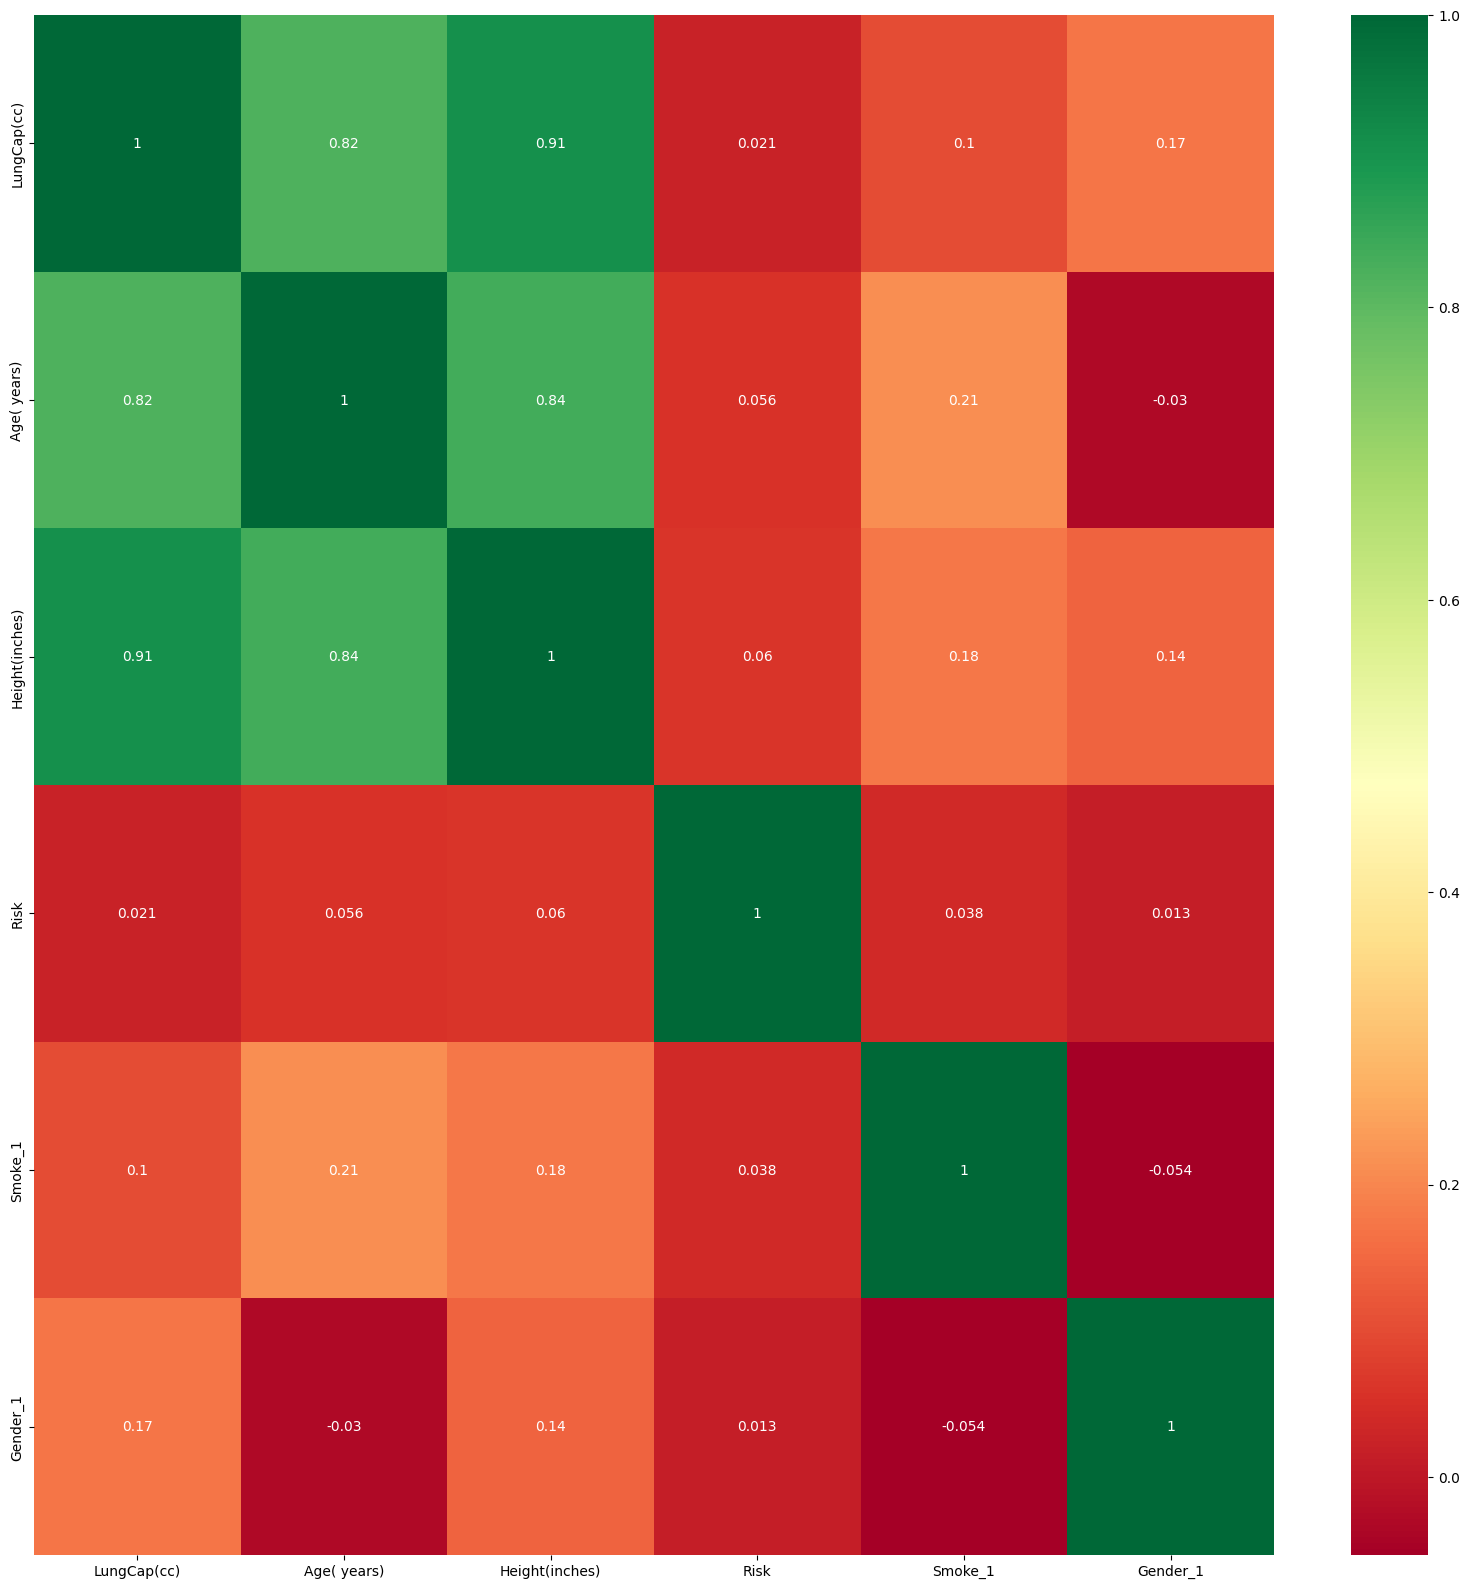

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corrmat=dummy.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(dummy[top_corr_features].corr(),annot=True,cmap="RdYlGn")

C:\Users\shrey\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


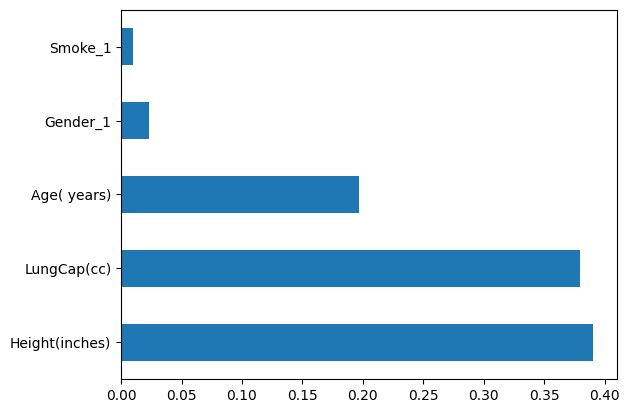

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,Y)
model.feature_importances_
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
regressor=DecisionTreeClassifier()
regressor.fit(X,Y)
selector=RFE(regressor,n_features_to_select=3,step=3)
selector.fit(X,Y)
print(selector.support_)
print(selector.ranking_)
X.columns

[ True  True  True False False]
[1 1 1 2 2]


Index(['LungCap(cc)', 'Age( years)', 'Height(inches)', 'Smoke_1', 'Gender_1'], dtype='object')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV
model=DecisionTreeClassifier()
selector=RFECV(estimator=model,step=1,cv=5,scoring="recall")
selector=selector.fit(X,Y)
print("the optimal number of features : ",selector.n_features_)
print("best features : ",X.columns[selector.support_])


the optimal number of features :  5
best features :  Index(['LungCap(cc)', 'Age( years)', 'Height(inches)', 'Smoke_1', 'Gender_1'], dtype='object')


C:\Users\shrey\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


feature 0, Score 0.04359
feature 1, Score 0.07834
feature 2, Score 0.08910
feature 3, Score 0.00193
feature 4, Score 0.00359


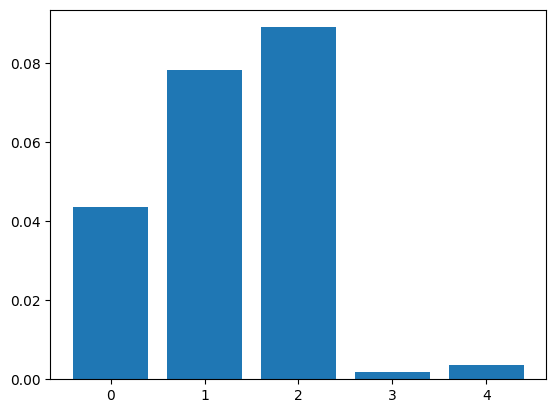

In [ ]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

model=KNeighborsClassifier()
model.fit(X,Y)
results=permutation_importance(model,X,Y,scoring='accuracy')
importance=results.importances_mean
for i,v in enumerate(importance):
    print('feature %0d, Score %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))],importance)
pyplot.show()

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2
X_new=SelectKBest(chi2,k=2).fit_transform(X,Y)
print(X_new)
print(X)

[[ 6.  62.1]
 [18.  74.7]
 [16.  69.7]
 ...
 [11.  60.5]
 [15.  64.9]
 [10.  67.7]]
     LungCap(cc)  Age( years)  Height(inches)  Smoke_1  Gender_1
0          6.475            6            62.1    False      True
1         10.125           18            74.7     True     False
2          9.550           16            69.7    False     False
3         11.125           14            71.0    False      True
4          4.800            5            56.9    False      True
..           ...          ...             ...      ...       ...
720        5.725            9            56.0    False     False
721        9.050           18            72.0     True      True
722        3.850           11            60.5     True     False
723        9.825           15            64.9    False     False
724        7.100           10            67.7    False      True

[725 rows x 5 columns]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

In [ ]:
scaler1=MinMaxScaler()
scaler2=StandardScaler()
scaler3=Normalizer()
X_mm=scaler1.fit_transform(X)
X_ss=scaler2.fit_transform(X)
X_n=scaler3.fit_transform(X)


In [ ]:
X1=pd.DataFrame(X_mm,columns=X.columns)
X2=pd.DataFrame(X_ss,columns=X.columns)
X3=pd.DataFrame(X_n,columns=X.columns)

In [ ]:
X1.describe()

,LungCap(cc),Age( years),Height(inches),Smoke_1,Gender_1
count,725.000000,725.000000,725.000000,725.000000,725.000000
mean,0.519209,0.582931,0.535240,0.106207,0.506207
std,0.187889,0.250297,0.197319,0.308315,0.500307
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.398292,0.375000,0.400000,0.000000,0.000000
50%,0.528868,0.625000,0.550685,0.000000,1.000000
75%,0.655915,0.750000,0.684932,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X2.describe()

,LungCap(cc),Age( years),Height(inches),Smoke_1,Gender_1
count,7.250000e+02,7.250000e+02,7.250000e+02,7.250000e+02,7.250000e+02
mean,5.267817e-16,-2.940177e-17,-1.046213e-15,-4.900295e-18,4.900295e-17
std,1.000690e+00,1.000690e+00,1.000690e+00,1.000690e+00,1.000690e+00
min,-2.765290e+00,-2.330567e+00,-2.714437e+00,-3.447132e-01,-1.012492e+00
25%,-6.439989e-01,-8.313113e-01,-6.858629e-01,-3.447132e-01,-1.012492e+00
50%,5.144495e-02,1.681923e-01,7.832575e-02,-3.447132e-01,9.876623e-01
75%,7.280930e-01,6.679441e-01,7.591484e-01,-3.447132e-01,9.876623e-01
max,2.560681e+00,1.667448e+00,2.356997e+00,2.900963e+00,9.876623e-01


In [ ]:
X3.describe()

,LungCap(cc),Age( years),Height(inches),Smoke_1,Gender_1
count,725.000000,725.000000,725.000000,725.000000,725.000000
mean,0.115228,0.181389,0.975035,0.001513,0.007601
std,0.029447,0.044971,0.010183,0.004407,0.007631
min,0.009809,0.053289,0.954046,0.000000,0.000000
25%,0.099596,0.150872,0.967140,0.000000,0.000000
50%,0.119396,0.187672,0.974712,0.000000,0.012117
75%,0.136006,0.216554,0.982491,0.000000,0.014786
max,0.185584,0.273490,0.998266,0.016951,0.020714


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X= df[['LungCap(cc)']]
y=df[['Risk']]
X_train, X_test,y_train, y_test = train_test_split(X,y ,
                                       random_state=12,
                                       test_size=0.25)

In [ ]:
print('X_train : ')
print(X_train.head())
print('')
print('X_test : ')
print(X_test.head())
print('')
print('y_train : ')
print(y_train.head())
print('')
print('y_test : ')
print(y_test.head())

X_train : 
     LungCap(cc)
424        8.550
317        1.025
450        4.350
623        7.675
462        7.125

X_test : 
     LungCap(cc)
153        4.525
552        9.025
555        8.850
394        7.775
341        6.325

y_train : 
     Risk
424     0
317     0
450     0
623     0
462     0

y_test : 
     Risk
153     0
552     0
555     0
394     0
341     1


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import preprocessing

In [ ]:
dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
# print(y_pred)
print("score :",metrics.accuracy_score(y_test,y_pred))

score : 0.7472527472527473


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[130,  13],
       [ 33,   6]], dtype=int64)

In [ ]:
y=np.random.choice(('Male','Female'),size=(10))

In [ ]:
y

array(['Female', 'Female', 'Male', 'Female', 'Male', 'Male', 'Male',
       'Male', 'Female', 'Male'], dtype='<U6')

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
yt=le.fit_transform(y)

In [ ]:
yt

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
data=np.array([[1,np.nan,2],[2,3,np.nan],[-1,4,2]])

In [ ]:
imp=SimpleImputer(strategy='mean')

In [ ]:
imp.fit_transform(data)

array([[ 1. ,  3.5,  2. ],
       [ 2. ,  3. ,  2. ],
       [-1. ,  4. ,  2. ]])

In [ ]:
imp=SimpleImputer(strategy='most_frequent')
imp.fit_transform(data)

array([[ 1.,  3.,  2.],
       [ 2.,  3.,  2.],
       [-1.,  4.,  2.]])

In [ ]:
imp=SimpleImputer(strategy='median')
imp.fit_transform(data)

array([[ 1. ,  3.5,  2. ],
       [ 2. ,  3. ,  2. ],
       [-1. ,  4. ,  2. ]])

In [ ]:
data=[
    {'price':850000,'rooms':4,'neighborhood':'Queen Anne'},
    {'price':700000,'rooms':3,'neighborhood':'Fremont'},
    {'price':650000,'rooms':3,'neighborhood':'Wallingford'},
    {'price':600000,'rooms':2,'neighborhood':'Fremont'}
]

In [ ]:
from sklearn.feature_extraction import DictVectorizer

In [ ]:
vec=DictVectorizer(sparse=False,dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [ ]:
vec=DictVectorizer(sparse=True,dtype=int)
d=vec.fit_transform(data)
print(d)

  (0, 1)	1
  (0, 3)	850000
  (0, 4)	4
  (1, 0)	1
  (1, 3)	700000
  (1, 4)	3
  (2, 2)	1
  (2, 3)	650000
  (2, 4)	3
  (3, 0)	1
  (3, 3)	600000
  (3, 4)	2


In [ ]:
sample=['problem of evil evil',
       'evil queen',
       'horizon problem']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vec=CountVectorizer()
vec.fit(sample)
X=vec.fit_transform(sample)
print(X)

  (0, 3)	1
  (0, 2)	1
  (0, 0)	2
  (1, 0)	1
  (1, 4)	1
  (2, 3)	1
  (2, 1)	1


In [ ]:
pd.DataFrame(X.toarray(),columns=vec.get_feature_names_out())

,evil,horizon,of,problem,queen
0,2,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vec=TfidfVectorizer()
X=vec.fit_transform(sample)
pd.DataFrame(X.toarray(),columns=vec.get_feature_names_out())

,evil,horizon,of,problem,queen
0,0.771006,0.000000,0.50689,0.385503,0.000000
1,0.605349,0.000000,0.00000,0.000000,0.795961
2,0.000000,0.795961,0.00000,0.605349,0.000000


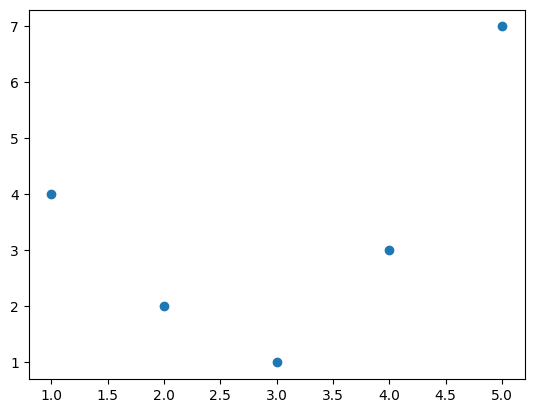

In [ ]:
x=np.array([1,2,3,4,5])
y=np.array([4,2,1,3,7])
plt.scatter(x,y)

In [ ]:
from sklearn.linear_model import LinearRegression

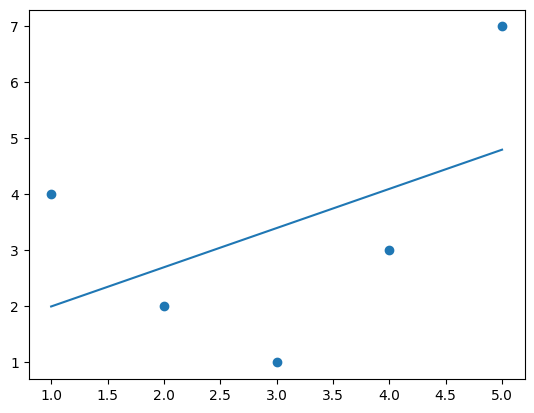

In [ ]:
X=x[:,np.newaxis]
model=LinearRegression().fit(X,y)
yfit=model.predict(X)
plt.scatter(x,y)
plt.plot(x,yfit)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=4,include_bias=False)
x2=poly.fit_transform(X)
print(x2)

[[  1.   1.   1.   1.]
 [  2.   4.   8.  16.]
 [  3.   9.  27.  81.]
 [  4.  16.  64. 256.]
 [  5.  25. 125. 625.]]


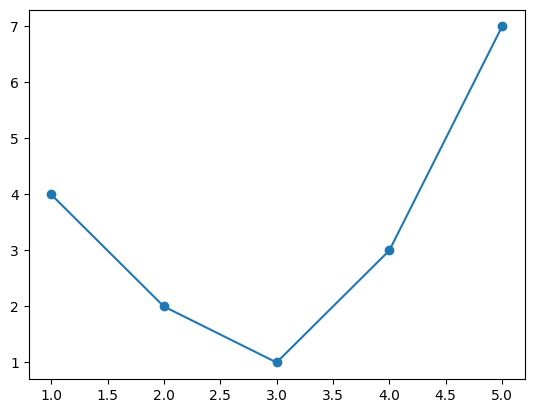

In [ ]:
model = LinearRegression().fit(x2,y)
yfit = model.predict(x2)
plt.scatter(x,y);
plt.plot(x, yfit);